# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (14)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**04/12/2023**

## Clasificación con árboles de decisión y bosques aleatorios  


In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

---

In [3]:
# Cargar el dataset desde un archivo

df_aire = pd.read_excel("ABT_CALIDAD_AIRE.xlsx")

In [4]:
# Consultar los registros del DataFrame
df_aire

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
0,4,Pza. de España,635,UT,01OCT17:00:00:00,77.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,0,1
1,4,Pza. de España,635,UT,01OCT17:01:00:00,34.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,1,1
2,4,Pza. de España,635,UT,01OCT17:02:00:00,26.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,2,1
3,4,Pza. de España,635,UT,01OCT17:03:00:00,18.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,3,1
4,4,Pza. de España,635,UT,01OCT17:04:00:00,12.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69616,47,Mendez Alvaro,599,UF,22FEB18:16:00:00,33.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,16,5
69617,47,Mendez Alvaro,599,UF,22FEB18:17:00:00,28.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,17,5
69618,47,Mendez Alvaro,599,UF,22FEB18:18:00:00,37.0,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,2,22,18,5
69619,47,Mendez Alvaro,599,UF,22FEB18:19:00:00,49.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,19,5


In [5]:
# Consultamos los registros que tienen algún valor nulo
df_aire.drop(df_aire.dropna().index)

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
36,4,Pza. de España,635,UT,02OCT17:12:00:00,NaN,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,2,12,2
255,4,Pza. de España,635,UT,11OCT17:15:00:00,83.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,15,4
258,4,Pza. de España,635,UT,11OCT17:18:00:00,48.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,18,4
259,4,Pza. de España,635,UT,11OCT17:19:00:00,69.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,19,4
260,4,Pza. de España,635,UT,11OCT17:20:00:00,148.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68096,47,Mendez Alvaro,599,UF,21DEC17:08:00:00,66.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2017,12,21,8,5
68391,47,Mendez Alvaro,599,UF,02JAN18:15:00:00,NaN,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,1,2,15,3
68770,47,Mendez Alvaro,599,UF,18JAN18:10:00:00,NaN,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,1,18,10,5
69058,47,Mendez Alvaro,599,UF,30JAN18:10:00:00,NaN,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,1,30,10,3


Para evitar problemas posteriores, usamos el método ``dropna()`` para limpiar el tablón de valores perdidos (**missing values**) y reiniciamos el índice. Comprobamos la cantidad de las filas filtradas.

In [6]:
df_air_filt = df_aire.dropna().reset_index(drop=True)
df_air_filt

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
0,4,Pza. de España,635,UT,01OCT17:00:00:00,77.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,0,1
1,4,Pza. de España,635,UT,01OCT17:01:00:00,34.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,1,1
2,4,Pza. de España,635,UT,01OCT17:02:00:00,26.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,2,1
3,4,Pza. de España,635,UT,01OCT17:03:00:00,18.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,3,1
4,4,Pza. de España,635,UT,01OCT17:04:00:00,12.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,47,Mendez Alvaro,599,UF,22FEB18:16:00:00,33.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,16,5
49250,47,Mendez Alvaro,599,UF,22FEB18:17:00:00,28.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,17,5
49251,47,Mendez Alvaro,599,UF,22FEB18:18:00:00,37.0,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,2,22,18,5
49252,47,Mendez Alvaro,599,UF,22FEB18:19:00:00,49.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,19,5


In [7]:
columnas_drop= ["Pto_trafico1",
                "Pto_trafico2",
                "Pto_trafico3",
                "Pto_trafico4",
                "Pto_trafico5",
                "Pto_trafico5",
                "anyo",
                "id_pto_calidad",
                "nombre_estacion",
                "tipo_estacion_id",
                "fecha"]

In [8]:
df_air_filt2 = df_air_filt.drop(columns=columnas_drop)
print("Tamaño del tablón filtrado: ", df_air_filt.shape)
print("Tamaño del tablón nuevo: ", df_air_filt2.shape)

Tamaño del tablón filtrado:  (49254, 86)
Tamaño del tablón nuevo:  (49254, 76)


In [9]:
# Utilizamos estas listas como categorías para poder agruparlos posteriormente
norte = ['NNE','NNW','NE','N']
sur = ['SSE','SSW','SW','S']
este = ['ENE','ESE','SE','E']
oeste = ['WNW','WSW','NW','W']

In [10]:
# Creamos un nuevo DataFrame con los datos agrupados
df_air_filt3 = df_air_filt2.copy()

Podemos usar el método `.replace()` en vez de aplicar funciones *lambda* como antes. 

In [11]:

# Modificamos directamente los valores del nuevo DataFrame (mediante inplace=True)
df_air_filt3['wind_dir'].replace(norte,"N", inplace=True) 
df_air_filt3['wind_dir'].replace(sur,"S", inplace=True)
df_air_filt3['wind_dir'].replace(oeste,"O", inplace=True)
df_air_filt3['wind_dir'].replace(este,"E", inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
etiquetado = LabelEncoder()
etiquetado.fit(df_air_filt3['wind_dir'])
etiquetado.classes_

array(['E', 'N', 'O', 'S'], dtype=object)

In [13]:
# Asignar una nueva columna
df_air_filt3['Dir_viento_etiquetado'] = etiquetado.transform(df_air_filt3['wind_dir'])

# mostrar la relación con el dato original
df_air_filt3.groupby(['wind_dir','Dir_viento_etiquetado']).count()[['mes']]

,,mes
wind_dir,Dir_viento_etiquetado,
E,0,8550
N,1,12204
O,2,16964
S,3,11536


In [14]:
# Definimos un nuevo dataframe con solamente datos transformados a valores numéricos
df_air_filt4 = df_air_filt3.drop('wind_dir', axis='columns')

# Consultar el tipo de las variables
df_air_filt4.dtypes.value_counts()

float64    60
int64      15
int32       1
Name: count, dtype: int64

In [15]:
# Importar el algoritmo de árboles de decisión y las métricas correspondientes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Generar la lista de features y la variable target
target = 'Calidad_NO2'
features = [x for x in df_air_filt4.columns if x!=target]

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotundamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_air_filt4[features], y=df_air_filt4[target])

# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_air_filt4[features])

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_air_filt4[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_air_filt4[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_air_filt4[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_air_filt4[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_air_filt4[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


El modelo consigue un rendimiento perfecto!! Ahora vamos a sacar **las variables más importantes** que ha detectado el modelo. El **árbol devuelve la importancia de cada una de ellas** en el orden en el que están las columnas en el dataframe. 

In [16]:
# Importancias de cada variable en el árbol ajustado (Gini importance)
arbol_importancia.feature_importances_

array([5.78163143e-03, 8.04938769e-04, 5.44098706e-03, 1.50786432e-03,
       2.66724686e-03, 1.16465757e-03, 7.67561386e-03, 3.18520872e-03,
       5.91213112e-03, 4.69569266e-03, 3.80539442e-03, 2.50096507e-03,
       2.84346300e-03, 4.79964557e-03, 2.23039688e-03, 4.40033948e-03,
       3.15211751e-03, 2.94962989e-03, 1.90435772e-02, 2.56158233e-03,
       2.48237387e-03, 4.70938083e-02, 4.11899693e-03, 2.98954622e-03,
       3.09670295e-03, 2.96708711e-03, 2.23720971e-03, 3.09501046e-04,
       2.96651661e-03, 3.48301914e-03, 3.08023789e-03, 4.61120403e-03,
       6.46565582e-03, 1.32903198e-02, 3.58631068e-03, 3.61907995e-03,
       5.01615807e-02, 3.43668346e-03, 3.97016144e-03, 1.58063078e-02,
       2.30510457e-03, 1.55769684e-03, 1.50244215e-03, 4.02858239e-03,
       1.49018634e-03, 0.00000000e+00, 2.78837747e-03, 2.89562350e-03,
       2.95020785e-03, 3.45650092e-03, 3.99469172e-03, 2.82719498e-03,
       6.95689753e-03, 7.90456687e-03, 2.17372165e-01, 2.14843538e-02,
      

Se observa que el método ``feature_importances_`` devuelve un array con las importancias como ratios. Para asociarlas, podemos crear una tabla con el nombre de las variables como índices y los valores de las importancias.

In [17]:
# Creamos un DataFrame con los datos de importancia
importancia = pd.DataFrame(data=arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
wind_kph,0.217372
hora,0.176578
humidity,0.072744
Carga_mediaR3_750_1000,0.050162
Intensidad_mediaR6_2000,0.047094
...,...
Intensidad_minR6_2000,0.000310
will_it_rain,0.000020
will_it_snow,0.000000
chance_of_snow,0.000000


Podemos obtener una lista con **las variables que aglutinan el 95% de la información**. Procedemos a añadir al DataFrame "_importancia_" que hemos creado en el caso anterior **la columna `imp_acum` que acumule la suma** y muestra el valor de la suma acumulativa.

In [18]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
wind_kph,0.217372,0.217372
hora,0.176578,0.393950
humidity,0.072744,0.466693
Carga_mediaR3_750_1000,0.050162,0.516855
Intensidad_mediaR6_2000,0.047094,0.563949
...,...,...
Intensidad_minR6_2000,0.000310,0.999980
will_it_rain,0.000020,1.000000
will_it_snow,0.000000,1.000000
chance_of_snow,0.000000,1.000000


In [19]:
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 85% de la información necesaria
variables = importancia.loc[importancia['imp_acum']>0.95].index.to_list()
print(variables)

['Intensidad_minR4_1000_1500', 'Intensidad_maxR1_500', 'Carga_maxR3_750_1000', 'Intensidad_mediaR2_500_750', 'Carga_maxR2_500_750', 'Carga_Pto_trafico1', 'Carga_maxR6_2000', 'Carga_maxR1_500', 'Distancia_Pto_trafico5', 'Intensidad_mediaR4_1000_1500', 'Carga_Pto_trafico2', 'Intensidad_mediaR5_1500_2000', 'Carga_minR1_500', 'Intensidad_minR5_1500_2000', 'Carga_Pto_trafico5', 'vis_km', 'Carga_minR2_500_750', 'Distancia_Pto_trafico4', 'Carga_minR3_750_1000', 'Carga_minR5_1500_2000', 'Distancia_Pto_trafico3', 'chance_of_rain', 'Distancia_Pto_trafico2', 'festivo', 'Intensidad_minR6_2000', 'will_it_rain', 'will_it_snow', 'chance_of_snow', 'Carga_minR6_2000']


In [20]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(variables))

Variables iniciales:  75
Variables no importantes (a eliminar):  29


Ahora podemos filtrar el tablón para quedarnos solamente con las variables más importantes.

In [21]:
df_air_filt5 = df_air_filt4.drop(labels=variables, axis='columns')
df_air_filt5

,ALTITUD,Calidad_NO2,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,635,77.0,60.589582,154.00,697.00,259.00,847.00,845.00,46.00,6.00,...,0,21.0,21.0,21.0,10.9,10,1,0,1,1
1,635,34.0,60.589582,159.00,753.00,282.00,854.00,929.00,48.00,8.00,...,0,20.6,20.6,20.6,11.1,10,1,1,1,1
2,635,26.0,60.589582,111.00,851.00,235.00,678.00,1056.00,41.00,5.00,...,0,20.1,20.1,20.1,11.2,10,1,2,1,1
3,635,18.0,60.589582,70.00,557.00,150.00,511.00,719.00,33.00,4.00,...,0,19.7,19.7,19.7,11.4,10,1,3,1,1
4,635,12.0,60.589582,66.00,532.00,167.00,439.00,632.00,25.00,5.00,...,11,19.5,19.5,19.5,11.2,10,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,599,33.0,323.225854,521.75,882.50,1427.00,113.75,1166.50,14.25,45.50,...,5,11.0,11.0,12.1,-7.0,2,22,16,5,1
49250,599,28.0,323.225854,497.00,1001.75,1413.75,135.00,1144.25,18.25,45.75,...,5,9.4,9.4,11.0,-6.6,2,22,17,5,1
49251,599,37.0,323.225854,559.75,1085.75,1487.50,138.25,1206.25,20.00,48.25,...,5,7.7,7.7,9.8,-6.2,2,22,18,5,1
49252,599,49.0,323.225854,518.50,1024.75,1535.75,139.00,1224.25,19.25,49.75,...,5,6.6,6.6,8.8,-5.9,2,22,19,5,3


In [22]:
# Hacemos una copia del tablón filtrado para no trabajar sobre el original
df_aire_calidad = df_air_filt5.copy()

In [23]:
# Crear la columna nueva "Escenario" y borrar la columna target antigua 'Calidad_NO2'
df_aire_calidad["Escenario"] = np.where(df_aire_calidad['Calidad_NO2']<df_aire_calidad['Calidad_NO2'].quantile(0.25),0,1)

df_aire_calidad.drop(['Calidad_NO2'], axis='columns', inplace=True)
df_aire_calidad

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
0,635,60.589582,154.00,697.00,259.00,847.00,845.00,46.00,6.00,493.727273,...,21.0,21.0,21.0,10.9,10,1,0,1,1,1
1,635,60.589582,159.00,753.00,282.00,854.00,929.00,48.00,8.00,500.659091,...,20.6,20.6,20.6,11.1,10,1,1,1,1,1
2,635,60.589582,111.00,851.00,235.00,678.00,1056.00,41.00,5.00,458.159091,...,20.1,20.1,20.1,11.2,10,1,2,1,1,1
3,635,60.589582,70.00,557.00,150.00,511.00,719.00,33.00,4.00,338.454545,...,19.7,19.7,19.7,11.4,10,1,3,1,1,0
4,635,60.589582,66.00,532.00,167.00,439.00,632.00,25.00,5.00,282.681818,...,19.5,19.5,19.5,11.2,10,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,599,323.225854,521.75,882.50,1427.00,113.75,1166.50,14.25,45.50,601.100000,...,11.0,11.0,12.1,-7.0,2,22,16,5,1,1
49250,599,323.225854,497.00,1001.75,1413.75,135.00,1144.25,18.25,45.75,641.575000,...,9.4,9.4,11.0,-6.6,2,22,17,5,1,1
49251,599,323.225854,559.75,1085.75,1487.50,138.25,1206.25,20.00,48.25,699.375000,...,7.7,7.7,9.8,-6.2,2,22,18,5,1,1
49252,599,323.225854,518.50,1024.75,1535.75,139.00,1224.25,19.25,49.75,673.100000,...,6.6,6.6,8.8,-5.9,2,22,19,5,3,1


In [24]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

Se puede observar la necesidad de llevar todas las variables de entrada a una escala estándar.

In [25]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[0.33027523, 0.03406823, 0.05414433, ..., 0.        , 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.05590226, ..., 0.04347826, 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.03902611, ..., 0.08695652, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.76519772, 0.19680056, ..., 0.7826087 , 0.66666667,
        0.33333333],
       [0.        , 0.76519772, 0.18229762, ..., 0.82608696, 0.66666667,
        1.        ],
       [0.        , 0.76519772, 0.16603674, ..., 0.86956522, 0.66666667,
        0.        ]])

In [26]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,0.330275,0.034068,0.054144,0.357436,0.008447,0.271322,0.366277,0.4600,0.0600,0.186757,...,0.00,0.694118,0.653740,0.665595,0.801418,0.818182,0.0,0.000000,0.000000,0.333333
1,0.330275,0.034068,0.055902,0.386154,0.009198,0.273565,0.402687,0.4800,0.0800,0.189393,...,0.00,0.682353,0.642659,0.652733,0.808511,0.818182,0.0,0.043478,0.000000,0.333333
2,0.330275,0.034068,0.039026,0.436410,0.007665,0.217186,0.457737,0.4100,0.0500,0.173235,...,0.00,0.667647,0.628809,0.636656,0.812057,0.818182,0.0,0.086957,0.000000,0.333333
3,0.330275,0.034068,0.024611,0.285641,0.004892,0.163690,0.311660,0.3300,0.0400,0.127725,...,0.00,0.655882,0.617729,0.623794,0.819149,0.818182,0.0,0.130435,0.000000,0.333333
4,0.330275,0.034068,0.023205,0.272821,0.005447,0.140626,0.273949,0.2500,0.0500,0.106521,...,0.11,0.650000,0.612188,0.617363,0.812057,0.818182,0.0,0.173913,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.000000,0.765198,0.183440,0.452564,0.046543,0.036438,0.505635,0.1425,0.4550,0.227579,...,0.05,0.400000,0.376731,0.379421,0.166667,0.090909,0.7,0.695652,0.666667,0.333333
49250,0.000000,0.765198,0.174739,0.513718,0.046111,0.043245,0.495990,0.1825,0.4575,0.242967,...,0.05,0.352941,0.332410,0.344051,0.180851,0.090909,0.7,0.739130,0.666667,0.333333
49251,0.000000,0.765198,0.196801,0.556795,0.048516,0.044286,0.522865,0.2000,0.4825,0.264942,...,0.05,0.302941,0.285319,0.305466,0.195035,0.090909,0.7,0.782609,0.666667,0.333333
49252,0.000000,0.765198,0.182298,0.525513,0.050090,0.044526,0.530668,0.1925,0.4975,0.254952,...,0.05,0.270588,0.254848,0.273312,0.205674,0.090909,0.7,0.826087,0.666667,1.000000


In [27]:
X_normal.describe().round(4)

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
count,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,...,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000
mean,0.5756,0.2551,0.1225,0.1576,0.0152,0.1269,0.1803,0.2446,0.1958,0.1469,...,0.3238,0.3748,0.3534,0.3632,0.5020,0.4416,0.4933,0.4991,0.4954,0.5464
std,0.3165,0.2755,0.1355,0.1598,0.0255,0.1166,0.1714,0.1897,0.1716,0.1159,...,0.3392,0.2072,0.1966,0.1964,0.1608,0.3941,0.2909,0.3015,0.3347,0.3410
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3303,0.0637,0.0216,0.0364,0.0029,0.0269,0.0315,0.0800,0.0600,0.0547,...,0.0300,0.2176,0.2050,0.2186,0.3865,0.0909,0.2333,0.2174,0.1667,0.3333
50%,0.6514,0.1049,0.0734,0.0990,0.0088,0.0887,0.1339,0.2000,0.1425,0.1232,...,0.1800,0.3324,0.3130,0.3215,0.5000,0.2727,0.5000,0.4783,0.5000,0.6667
75%,0.8624,0.3345,0.1676,0.2290,0.0218,0.2079,0.2805,0.3825,0.2900,0.2121,...,0.6100,0.5029,0.4737,0.4630,0.6206,0.9091,0.7333,0.7391,0.8333,0.6667
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [28]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

---

## Clasificadores basados en Árboles de decisión (_Decision Tree Classifires_)

In [29]:
from sklearn.tree import DecisionTreeClassifier

arbol_clas = DecisionTreeClassifier(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
arbol_clas.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_arbol = arbol_clas.predict(X_test)

In [30]:
arbol_opt = DecisionTreeClassifier(max_depth=11,
                                   random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
arbol_opt.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_arbol_opt = arbol_opt.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score


def curva_aprendizaje_arbol(profundidad: int=None):
    """Función para sacar la gráfica de Learning Curve a partir de la profundidad del árbol"""

    # Se toma el valor entero y si no se indica nada por defecto se pasa el None como la profundidad máxima
    if profundidad:
        hiper_parametro = int(profundidad)
    else:
        hiper_parametro = None

    # Generar la estructura del árbol
    modelo_arbol = DecisionTreeClassifier(max_depth=hiper_parametro, random_state=100)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],100).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % hiper_parametro)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()    


---

### **`Ejercicio 14.1`**

**`14.1.1`** Realiza una búsqueda del valor de hiperparámetro y el modelo óptimo usando la técnica de *Grid Search* para el rango indicado de profundidades y compáralo con el valor sugerido anteriormente en la sesión.
- rango de profundidades:  de `2` a `20` __no inclusive__   
- para `KFold`  >>> `n_splits=10` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100`  
- para scoring:  `el área bajo la curva de funcionamiento del receptor`   

**`14.1.2`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
- Accuracy
- Classification report
- Confusion matrix
- AUC
- ROC (Curve) 

**`14.1.3`** Saca la gráfica de el *Learning Curve* para el modelo óptimo, usando la función definida en la sesión y explica si este modelo tiene preferencia o no, comparando con modelos anteriores.

Aquí realizamos la búsqueda con un rango amplio de profundidades para el árbol que vamos a ajustar, haciendo un *10-fold cross-validation* de los datos de entrenamiento:

In [32]:
## Solución
# Ejercicio 14.1.1
from sklearn.model_selection import GridSearchCV, KFold

folds_14_1 = KFold(n_splits=10, shuffle=True, random_state=111) 

modelo_14_1 = DecisionTreeClassifier(random_state=100)
params_14_1 = {"max_depth":list(range(2,20))} 

modelo_grid_14_1 = GridSearchCV(estimator=modelo_14_1,
                          param_grid=params_14_1,
                          scoring='roc_auc',
                          cv=folds_14_1,
                          n_jobs=-1)

modelo_grid_14_1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]},
             scoring='roc_auc')

In [33]:
print("Hiperparámetro óptimo:", modelo_grid_14_1.best_params_)

Hiperparámetro óptimo: {'max_depth': 8}


> #### Explicación 14.1.1
> Para modelos anteriores en l sesión, el valor del hperparámetro óptimo era **11**, e inicialmente utilizabamos **30** por defecto. En este caso, tenemos un valor = **8**, claramente el más bajo.

In [34]:
## Solución
# Ejercicio 14.1.2
y_pred_14_1 = modelo_grid_14_1.predict(X_test)
y_pred_14_1

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_14_1))

Accuracy: 0.8640747132270835


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_14_1))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      2404
           1       0.90      0.92      0.91      7447

    accuracy                           0.86      9851
   macro avg       0.82      0.80      0.81      9851
weighted avg       0.86      0.86      0.86      9851



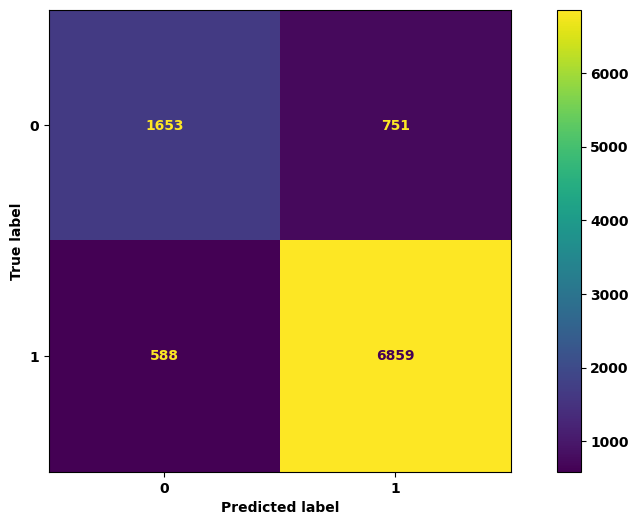

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_14_1),
                               display_labels=modelo_grid_14_1.classes_)
disp.plot()

plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
print("Área bajo la curva ROC", roc_auc_score(y_test, y_pred_14_1))

Área bajo la curva ROC 0.8043230118461085


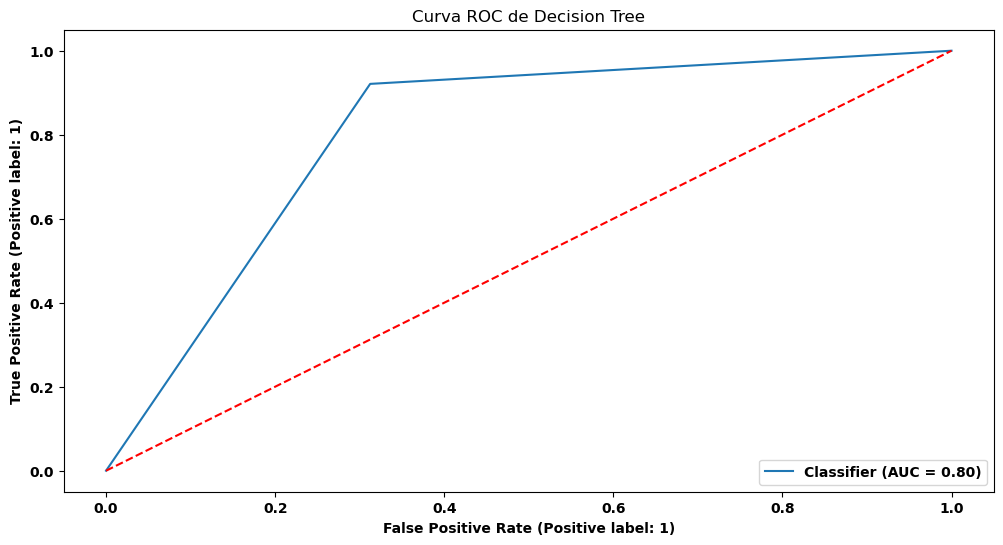

In [39]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_14_1)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.title("Curva ROC de Decision Tree")
plt.show()

> #### Explicación 14.1.2
> El modelo tiene unas métricas ciertamente **parecidas**, difiere en algunos valores pero por lo general para todas las métricas hay ua diferencia de decimales. Sin embargo, hay que decir que este modelo es el que tiene la profundidad más baja, lo que sí lo convierte en el modelo con **mejor** **rendimiento**, **disminuyendo** los **recursos** que necesita, su nivel de **complejidad**, y su **probabilidad** de **overfitting**.

La diferencia final del rendimiento del modelo entre training y test es=  0.01877684629884091


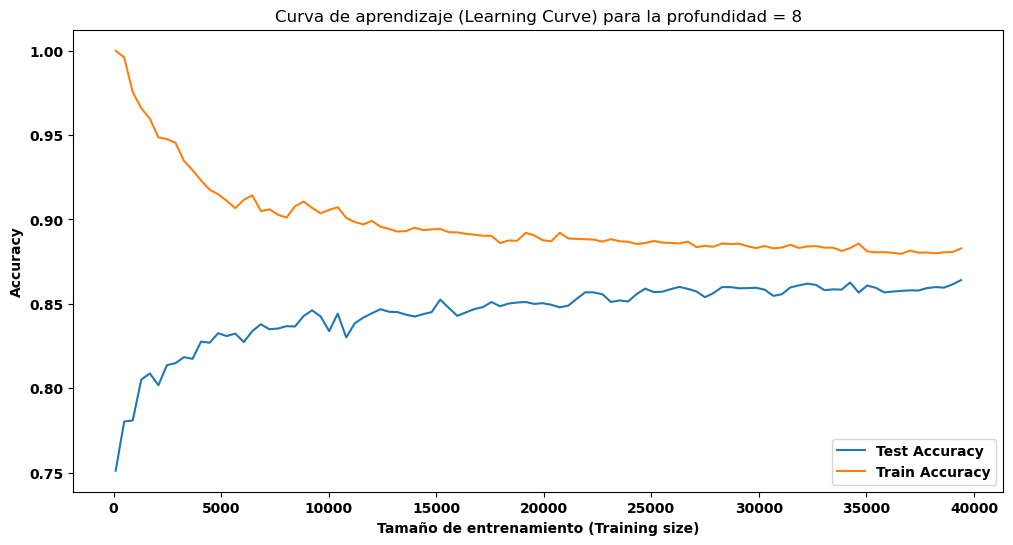

In [40]:
## Solución
# Ejercicio 14.1.3
curva_aprendizaje_arbol(profundidad=modelo_grid_14_1.best_estimator_.get_depth())

> #### Explicación 14.1.3
> Este modelo presenta una diferencia (gap) entre Test y Train que se va **reduciendo** poco a poco segun aumenta el tamaño del entrenamiento, sumado a la **tendencia ascendente** de la gráfica para el conjunto de test. 
> Por otro lado, podemos observar que con el tiempo, dichas gráficas tienen una probabilidad muy alta de acabar **convergiendo**.
> Considero que este modelo **no** presenta **riesgo** aparente de **overfitting**, y que puede ser un modelo con **preferencia** por ahora, debido a su relación entre rendimiento y complejidad.

---

In [41]:
# importamos el modelo de clasificación con bosques aleatorios
from sklearn.ensemble import RandomForestClassifier

bosque_clas = RandomForestClassifier(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
bosque_clas.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_bosque = bosque_clas.predict(X_test)

In [42]:
bosque2 = RandomForestClassifier(max_depth=4,
                                 n_jobs=-1,
                                 random_state=100)
bosque2.fit(X_train, y_train)
y_pred_bosque2 = bosque2.predict(X_test) 

In [43]:
bosque_opt = RandomForestClassifier(max_depth=23,
                                    n_estimators=300,
                                    n_jobs=-1,
                                    random_state=100,
                                    oob_score=True)
bosque_opt.fit(X_train, y_train)
y_pred_bosque_opt = bosque_opt.predict(X_test) 

---

### **`Ejercicio 14.2`**

**`14.2.1`** Define con funciones de _numpy_ los rangos indicados y realiza una búsqueda del bosque óptimo usando la técnica de *Grid Search* para la validación cruzada tipo **`5-fold-CV`**. Después, compáralos con los valores sugeridos anteriormente en la sesión.
-             parametros={'n_estimators': [150, 200, 250, 300, 350],
                          'max_depth': [20, 25, 30]}
- para `KFold`  >>> `n_splits=5` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100`
- para scoring:  `el área bajo la curva de funcionamiento del receptor` 


**`14.2.2`** Calcula diferentes métricas para evaluar tu modelo óptimo que se ha conseguido mediante el _grid search_ y analiza su rendimiendo en comparación con modelos anteriores.
- Accuracy
- Classification report
- Confusion matrix
- AUC
- ROC (Curve) 

**`14.2.3`** Saca la gráfica del *Learning Curve* para el modelo óptimo y el segundo bosque desarrollado en la sesión (_bosque2_), definiendo y aplicando una función nueva considerando los siguientes puntos y explica si este modelo tiene mejor rendimiento o no:

- Incluye la métrica de `OOB score`
- Indica `random_state=100`
- (*Sugerencia*: No incluye más de 20 puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para el modelo)

In [44]:
## Solución
# Ejercicio 14.2.1
from sklearn.model_selection import GridSearchCV, KFold

folds_14_2 = KFold(n_splits=5, shuffle=True, random_state=111) 

modelo_14_2 = RandomForestClassifier(random_state=100,
                                     n_jobs=-1)

params_14_2={'n_estimators': np.arange(150, 350+1, 50),
                          'max_depth': np.arange(20, 30+1, 5)}

modelo_grid_14_2 = GridSearchCV(estimator=modelo_14_2,
                          param_grid=params_14_2,
                          scoring='roc_auc',
                          cv=folds_14_2,
                          n_jobs=-1)

modelo_grid_14_2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': array([20, 25, 30]),
                         'n_estimators': array([150, 200, 250, 300, 350])},
             scoring='roc_auc')

In [45]:
print("Hiperparámetro óptimo:", modelo_grid_14_2.best_params_)

Hiperparámetro óptimo: {'max_depth': 25, 'n_estimators': 350}


> #### Explicación 14.2.1
> En el anterior modelo para esta sección hablabamos de valores para los hiperparámetros optimos de **300** para el **número de arboles** y **23** para la **profundidad máxima** del bosque, en el caso de nuestro ejercicio, el valor de la profundidad aumenta a **25**, y el de el número de árboles a **350**.
> Esto hara que el modelo sea algo más **pesado y complejo**, por lo que habrá que observar sus métricas par analizar su rendimiento.

In [46]:
## Solución
# Ejercicio 14.2.2
y_pred_14_2 = modelo_grid_14_2.predict(X_test)
y_pred_14_2

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_14_2))

Accuracy: 0.9133082935742565


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_14_2))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2404
           1       0.92      0.97      0.94      7447

    accuracy                           0.91      9851
   macro avg       0.91      0.85      0.87      9851
weighted avg       0.91      0.91      0.91      9851



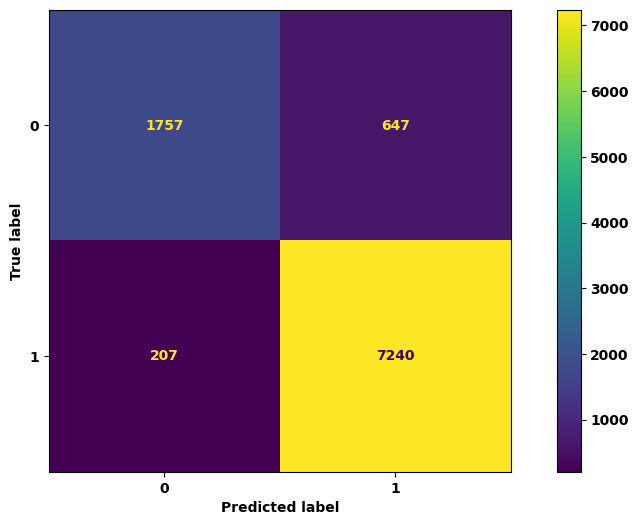

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_14_2),
                               display_labels=modelo_grid_14_2.classes_)
disp.plot()

plt.show()

In [50]:
from sklearn.metrics import roc_auc_score
print("Área bajo la curva ROC", roc_auc_score(y_test, y_pred_14_2))

Área bajo la curva ROC 0.8515343982668875


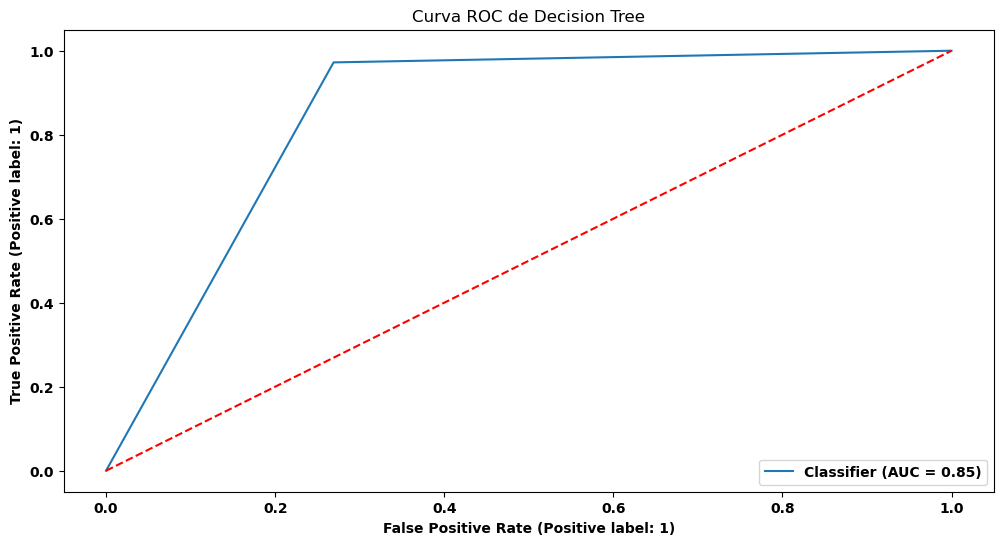

In [51]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_14_2)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.title("Curva ROC de Decision Tree")
plt.show()

> #### Explicación 14.2.2
> Cabe destacar que para este modelo hay métricas que han **mejorado**, quiza no de una forma exagerada, pero si lo suficiente como para destacar, por ejemplo, el area bajo la curva ROC, algunas distribuciones dentro de la matriz de confusión, o incluso la Accuracy. Todo esto si lo **comparamos con modelos de DecisionTree**, ya que entre los diferentes modelos de **RandomForest**, los valores de las métricas son muy **parecidos**. 

In [52]:
## Solución
# Ejercicio 14.2.3
def curva_aprendizaje_14_2(profundidad: int=None, n_arboles: int=None):
    profundidad = int(profundidad)
    n_arboles = int(n_arboles)

    modelo_arbol = RandomForestClassifier(max_depth=profundidad,
                                          n_estimators=n_arboles,
                                          random_state=100,
                                          oob_score=True,
                                          n_jobs=-1)
    
    num_samples = np.linspace(100, X_train.shape[0]).astype(int)

    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)
    oob_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))
        oob_score[i] = modelo_arbol.oob_score_

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])
    print("El mejor valor de OOB es =", max(oob_score))
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.plot(num_samples, oob_score, label = 'OOB score')
    plt.plot(num_samples[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="Max oob_score")
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = ' + str(profundidad) + 'y n_arboles = ' + str(n_arboles))
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()

La diferencia final del rendimiento del modelo entre training y test es=  0.08669170642574353
El mejor valor de OOB es = 0.9138082901554404


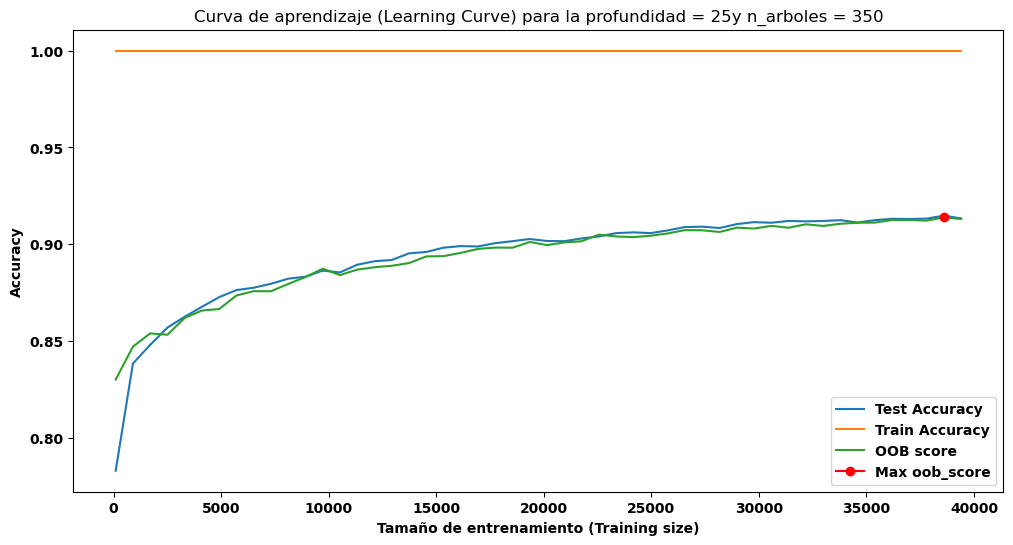

In [56]:
curva_aprendizaje_14_2(profundidad=modelo_grid_14_2.best_estimator_.max_depth, n_arboles=modelo_grid_14_2.best_estimator_.n_estimators)

La diferencia final del rendimiento del modelo entre training y test es=  0.0030915556390631593
El mejor valor de OOB es = 0.83


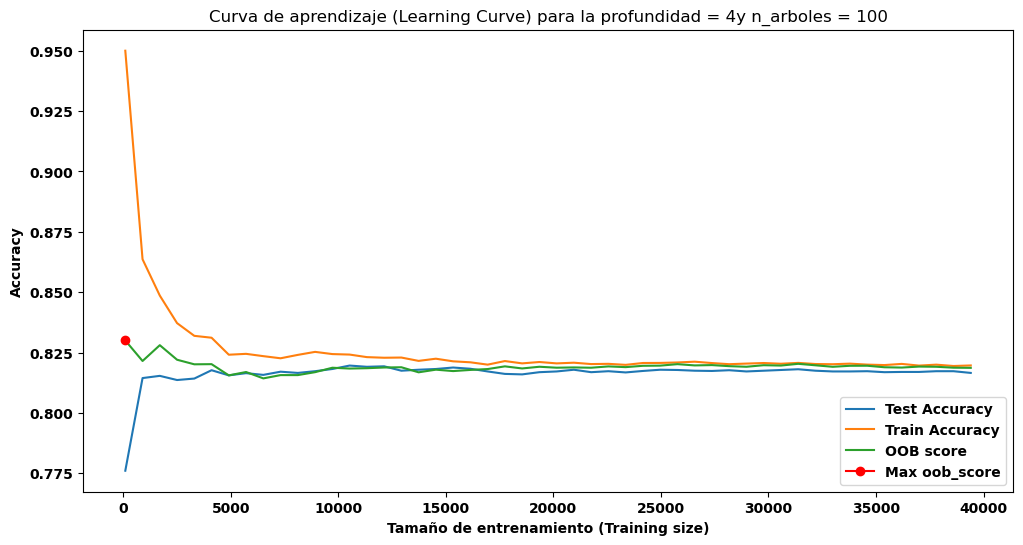

In [57]:
curva_aprendizaje_14_2(profundidad=bosque2.max_depth, n_arboles=bosque2.n_estimators)

> #### Explicación 14.2.3
> Analizando ambas curvas de aprendizaje, podemos decir que la curva de nuestro modelo óptimo presenta una **tendencia ascendente** que poco a poco va **reduciendo el gap** con la grafica del subconjunto de train, aunque aun le queda bastante para converger. Es cierto que se maneja en **valores de Accuracy bastante buenos**, y **no** presenta **riesgo** de **overffiting**, por lo que todo apunta a que su **rendimiento** es **bueno**.
>
> La curva de aprendizaje del modelo de la sesión presenta **peores gráficas**, con una **tendencia** que es casi **inmóvil** (ni asciende ni desciente), pero que esta cerca de converger debido a la caída en las métricas para el subconjunto de train. Su **gap se reduce**, pero considero que la **probabilidad** de que este modelo sufra de **underfitting** es bastante **mayor** que el modelo del ejercicio. 

---

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
# Importamos la librería instalada
from xgboost import XGBClassifier 

In [60]:
# LLamar al modelo, entrenarlo y sacar los valores predichos
modelo_xgb = XGBClassifier(random_state=100) 
modelo_xgb.fit(X_train, y_train) 
y_pred_xgb = modelo_xgb.predict(X_test)

---

### **`Ejercicio 14.3`**

- Saca la gráfica del ***Learning Curve*** para este modelo considerando los siguientes puntos y explica si este modelo tiene un buen rendimiento y preferencia respecto a otros, comparandolo con modelos anteriores:

    - Indica `random_state=100`
    - (*Sugerencia*: No incluye más de 20 puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para el modelo)

La diferencia final del rendimiento del modelo entre training y test es=  0.04631457257666294


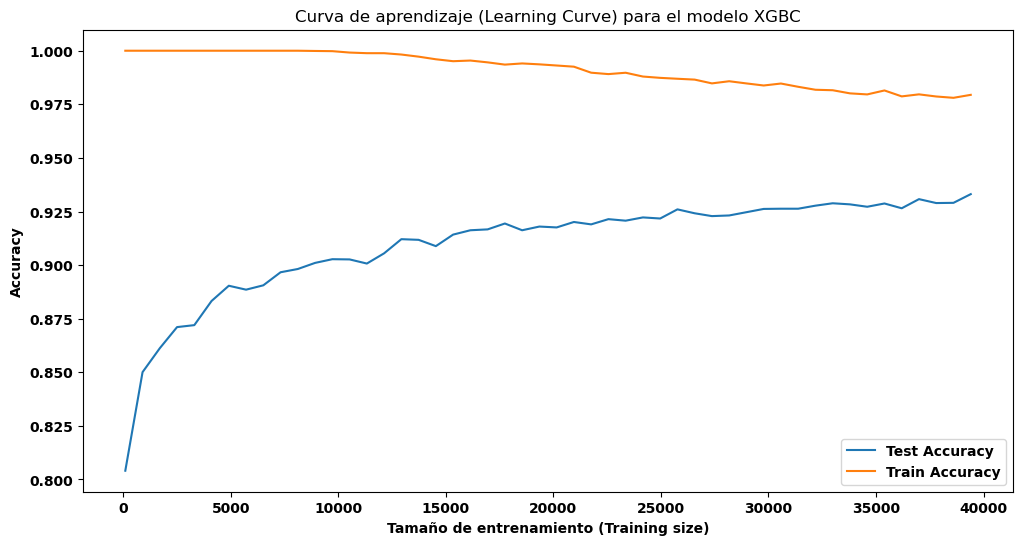

In [61]:
## Solución
# Ejercicio 14.3

modelo_arbol = XGBClassifier(random_state=100)

num_samples = np.linspace(100, X_train.shape[0]).astype(int)

train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)

for i in range(num_samples.size):
    modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el modelo XGBC')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()    

> #### Explicación 14.3
> Este modelo presenta una curva de aprendizaje con una **tendencia** para la gráfica del subconjunto de test **ascendente**, que poco a poco provoca que el **gap** entre train y test sea **menor**, esto nos hace pensar que es muy probable que si el tamaño de entrenamiento aumenta, estas gráficas acaben **convergiendo**.
> Los valores de las métricas de accuracy en los que se maneja son **bastante buenos**, lo que tambien da a pensar que su **rendimiento** es **bastante bueno**.
>
> Considero que es uno de los **mejores modelos** de la sesión, y que tiene una preferencia mayor en comparación a otros modelos de la sesión. 